## Agents, Multi-Agent Systems and Reinforcement Learning Assignment 2
### Luke Hayes
### 14498098


In [102]:
import numpy as np
import random

# ALL GLOBAL VARIABLES
BOARD_ROWS = 5
BOARD_COLS = 5
WIN_STATE = (4, 4)
START = (0, 0)
HOLES = [(1,0),(1,3),(3,1),(4,2)]
ACTIONS = ["up","down","left","right"]
ALPHA = 0.5
GAMMA = 0.9
EPSILON = 0.1
REWARD_PER_EPISODE = []
REWARD_PER_EPISODE_DECAYING = []
#STATE CLASS
class State:
    def __init__(self, state=START):     
        #INITIALISE STATE TO THE START STATE AND SET THE isend TO FALSE
        self.state = state
        self.isEnd = False        
    
    #FUNCTION THAT WILL RETURN THE REWARD FOR A STATE
    def getReward(self, state):
        #CHECK IF THE CURRENT STATE IS ONE OF THE HOLES
        #IF SO RETURN -5
        for index, tuple in enumerate(HOLES):
            if state == tuple:
                #print("Entered a hole")
                return -5
        #CHECK IF AGENT HAS REACHED THE WIN STATE AND GIVE A REWARD OF 10 IF TRUE
        if state == WIN_STATE:
            return 10 
        #OTHERWISE GIVE A REWARD OF -1
        else:
            return -1

    #FUNCTION TO CHECK IF WE HAVE REACHED A TERMINAL STATE 
    #RETRURNS TRUE IF WE FALL INTO A HOLE OR REACH THE FINAL GOAL STATE
    def isEndFunc(self):
        if (self.state == WIN_STATE):
            self.isEnd = True
            return True
        for index, tuple in enumerate(HOLES):
            if self.state == tuple:
                self.isEnd = True
                return True
        return False

    #WILL RETURN THE NEXT STATE ONCE THE ACTION IS GIVEN
    def nxtPosition(self, action):        
        if action == "up":                
            nxtState = (self.state[0] - 1, self.state[1])                
        elif action == "down":
            nxtState = (self.state[0] + 1, self.state[1])
        elif action == "left":
            nxtState = (self.state[0], self.state[1] - 1)
        else:
            nxtState = (self.state[0], self.state[1] + 1)
            
        if (nxtState[0] >= 0) and (nxtState[0] <= (BOARD_ROWS - 1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (BOARD_COLS-1)):                    
                    return nxtState
        #OFF GRID MOVES WILL LEAD TO NO CHANGE
        return self.state 

#AGENT CLASS
class Agent:
    def __init__(self):
        self.states = []
        self.actions = ["up", "down", "left", "right"]
        self.State = State()
        self.discount = 0.9
        self.epsilon = 0.1
        
        #WANT A Q VALUE DICTIONARY AS SUCH 
        #(STATE, ACTION) : VALUE
        #((0,0) -> Right): VALUE)
        self.state_values = {}        
        #LOOP FOR ALL ROWS
        for i in range(BOARD_ROWS):
            #LOOP FOR ALL COLUMNS
            for j in range(BOARD_COLS):
                #LOOP FOR ALL POSSIBLE 4 MOVES
                for k in range(4):
                    #CREATE A DICTIONARY ENTRY IN THE REQUIRED FORMAT
                    strv = str("(" + str(i) + "," + str(j) + ") -> " + str(ACTIONS[k]) + ")")
                    #ADD A VALUE OF ZERO TO THAT ENTRY 
                    self.state_values[strv] = 0

        self.new_state_values = {}
            
    #Q LEARNING METHODS 
    def q_learning(self, episodes, decaying):
        NUM_STATES = BOARD_ROWS * BOARD_COLS  

        
        #VARIABLE TO KEEP TRACT OF EPISODES
        x = 0
        
        #LOOP FOR ALL EPISODES
        while x < episodes:
            
            if(decaying == True):
                self.epsilon = self.epsilon - 0.0001
            
            #THIS WILL BE TRUE WHEN WE WANT THE EPISODE TO END (EITHER REACHED THE GOAL OR ENTERES A HOLE)
            episode_over = False
            
            #INITIAL STATE
            self.State = State(state=START)
            #THIS WILL LOOK AFTER THE ACCUMULATED EPISODAL REWARD
            total_reward = 0

            #WHILE WE ARE NOT FINISHED THIS EPISODE
            while episode_over == False:
                

                #GENERATE RANDOM NUMBER BETWEEN 0 AND 1 TO DECIDE IF WE SHOULD TAKE A RANDOM ACTION OR SELECT ACTION WITH HIGHEST Q VALUE                
                randval = random.uniform(0, 1)
                
                #WILL STORE OUR NEXT MOVE LATER
                next_move = ""
                
                #IF THE RANDOM NUMBER GENERATOR IS LESS THAN OR EQUAL TO EPSILON (0.1) WE SELECT A RANDOM ACTION
                if (randval <= self.epsilon):
                    #WE SELECT A RANDOM MOVE
                    #SELECT A RANDOM NUMBER BETWEEN 1 AND 4
                    move_position = random.randint(0,3)
                    #SELECT THAT RANDOM ACTION FROM THE INDEX
                    next_move = ACTIONS[move_position]
                    #GET THE REWARD FOR THAT MOVE 
                    reward = self.State.getReward(self.State.nxtPosition(next_move))
                
                #ELSE WE WILL SELECT THE ACTION WITH THE HIGHEST Q VALUE
                else:
                    #LISTS TO STORE VALUES
                    reward_list = []
                    q_list = []
                    
                    #LOOP THROUGH THE ACTIONS
                    for move in ACTIONS:
                        #GET THE REWARD FOR EACH ACTION 
                        reward = self.State.getReward(self.State.nxtPosition(move))
                        #APPEND THESE REWARDS TO A LIST
                        reward_list.append(reward)
                        #GET THE DEICTIONARY KEY FOR THE MOVES Q VALUE
                        strv = str("(" + str(self.State.state[0]) + "," + str(self.State.state[1]) + ") -> " + str(move) + ")")
                        #ADD THAT TO THE Q LIST SO WE CAN SELECT THE BEST
                        q_list.append(self.state_values[strv])
                        
                    #SELECT THE MAX Q VALUE
                    max_q = max(q_list)
                    
                    #SOME Q VALUES CAN BE THE SAME AND WE DONT WANT TO TAKE THE FIRST EVERYTIME 
                    #SO ADD THE INDEX OF THE SAME ONES TO A LIST AND RANDOMLY SELECT ONE 
                    q_equal_to_max_lst = []
                    index = 0
                    
                    #LOOP THROUGHT HE Q LIST OF VALUES FOR THE MOVES 
                    for q in q_list:
                        #IF THE Q VALUE MATCHES THE MAXIMUM WE ADD THE INDEX TO A LIST
                        if q == max_q:
                            q_equal_to_max_lst.append(index)
                        index += 1
                        
                    #CHOOSE AN INDEX FROM THE Q VALUES THAT MATCH THE MAXIMUM AT RANDOM
                    random_index = random.choice(q_equal_to_max_lst)
                    
                    #GET THE MOVE FOR THAT INDEX
                    next_move = ACTIONS[random_index]
                    #GET THE REWARD FOR THAT MOVE
                    reward = reward_list[random_index]

                #ADD THE REWARD TO THE CUMMULATIVE REWARD FOR THE EPISODE
                total_reward += reward
                                    
                #GET THE NEXT STATE
                next_state = self.State.nxtPosition(next_move)
                    
                #KEEP TRACK OF THE OLD STATE
                old_state = self.State.state
                                
                #SET THE STATE TO THE NEXT STATE
                self.State.state = next_state
                
                #GET THE Q VALUE FOR THE OLD STATE WITH THE MOVE WE ARE TAKING  
                strv_old = str("(" + str(old_state[0]) + "," + str(old_state[1]) + ") -> " + str(next_move) + ")")
                old_q_val = self.state_values[strv_old]
                
                #WE NEED TO LOOP THROUGH THE Q VALUES FOR THE NEXT STATE AND TAKE THE MAXIMUM 
                #PUT ALL THE Q VALUES FROM THE NEXT STATE TO A LIST
                next_state_q_vals = []
                #LOOP THROUGH ALL THE MOVES
                for move in ACTIONS:
                    strv_new = str("(" + str(self.State.state[0]) + "," + str(self.State.state[1]) + ") -> " + str(move) + ")")
                    next_state_q_vals.append(self.state_values[strv_new])
                
                #GET THE MAXIMUM Q VALUE FOR THE NEXT STATE
                new_q_val = max(next_state_q_vals)
                    
                #USE THE Q LEARNING FORMULA TO GET THE NEW Q VALUE FOR THE CURRENT STATE ACTION WE ARE IN
                updated_q_val = old_q_val + ALPHA * (reward + GAMMA * (new_q_val) - old_q_val)

                #SET THE Q VALUE OF THE CURRENT STATE, ACTION TO THE NEW UPDATED VALUE
                self.state_values[strv_old] = updated_q_val
                    
                #THE EPSIODE ENDS IF WE FALL INTO ONE OF THE HOLES
                #OR REACH THE DESIRED GOAL
                #CHECK IF WE NEED TO END
                if self.State.isEndFunc() == True:
                    #IF TRUE WE END THE EPISODE USING A BOOL
                    if(decaying == False):
                        REWARD_PER_EPISODE.append(total_reward)
                    else:
                        REWARD_PER_EPISODE_DECAYING.append(total_reward)
                    episode_over = True
            
    
            #print(x)
            #print(total_reward)
            #INCREMEMENT THE COUNTER LOOKING AFTER THE EPISODES
            x += 1

    #FUNCTION TO PRINT THE FINAL Q VALUES AT THE END OF TRAINING
    def showValues(self):
        #WE ONLY WANT TO PRINT THE MAX Q VALUE FOR EACH STATE 
        for i in range(0, BOARD_ROWS):
            print('----------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                values = []
                for move in ACTIONS:
                    strv_new = str("(" + str(i) + "," + str(j) + ") -> " + str(move) + ")")
                    values.append(self.state_values[strv_new])
                max_q = max(values)
                out += str(str(round(max_q,3)).ljust(6) + ' | ')
            print(out)
        print('----------------------------------------------')

#MAIN METHOD
if __name__ == "__main__":
    #CREATE AN AGENT OBJECT
    ag = Agent()
    #RUN THE Q LEARNING STEP FOR 10000 ITERATIONS
    ag.q_learning(10000, False)
    #PRINT THE FINAL Q VALUES
    print(ag.showValues())
    #RUN THE Q LEARNING STEP FOR 10000 ITERATIONS
    ag.q_learning(10000, True)
    #PRINT THE FINAL Q VALUES
    print(ag.showValues())


----------------------------------------------
| -0.434 | 0.629  | 1.81   | 3.122  | 4.58   | 
----------------------------------------------
| 0      | 1.81   | 3.122  | 0      | 6.2    | 
----------------------------------------------
| 1.81   | 3.122  | 4.58   | 6.2    | 8.0    | 
----------------------------------------------
| -0.547 | 0      | 6.2    | 8.0    | 10.0   | 
----------------------------------------------
| -1.306 | -1.426 | 0      | 10.0   | 0      | 
----------------------------------------------
None
----------------------------------------------
| -0.434 | 0.629  | 1.81   | 3.122  | 4.58   | 
----------------------------------------------
| 0      | 1.81   | 3.122  | 0      | 6.2    | 
----------------------------------------------
| 1.81   | 3.122  | 4.58   | 6.2    | 8.0    | 
----------------------------------------------
| -0.547 | 0      | 6.2    | 8.0    | 10.0   | 
----------------------------------------------
| -1.306 | -1.426 | 0      | 10.0   | 0      |

As can be seen from the resulting maximum Q values for each state above, as we get closer to the final state that has a high reward of +10, the reward given for each state get higher. The agent has 3 paths available that will give the exact same reward as it will lead to getting to the end state in the same number of steps. Therefore, the agent has learned the optimal route to travel. 

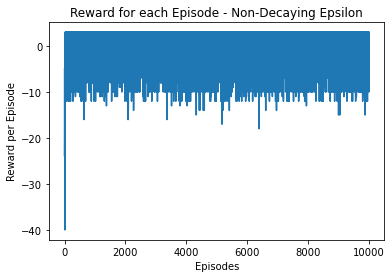

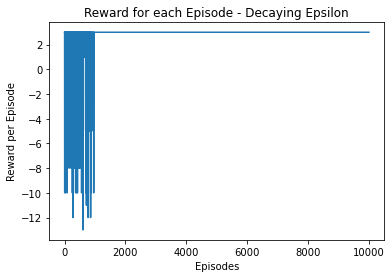

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

episodes = []
for i in range(10001):
    if i != 0:
       episodes.append(i)
        
plt.plot(episodes,REWARD_PER_EPISODE)
plt.title('Reward for each Episode - Non-Decaying Epsilon')
plt.xlabel('Episodes')
plt.ylabel('Reward per Episode')
plt.show()

plt.plot(episodes,REWARD_PER_EPISODE_DECAYING)
plt.title('Reward for each Episode - Decaying Epsilon')
plt.xlabel('Episodes')
plt.ylabel('Reward per Episode')
plt.show()


As can be seen from the first figure above the use of a epsion value of 0.1 is quite large and thus exploration is encouraged even though the agent knows it will achieve a poor reward. This means that even though the agent knows the best route to take, it will end up in holes quite often and this some episodes will return a poor reward. To illustrate the effect of the epsilon value I have included a run where the epsilon value decays by 0.0001 with each run. We can clearly see the effect this has and as the run goes on the agent will do much less exploration (stop choosing random moves), and will therefore pick the perfect route each time. 